Question 5

In [68]:
import math
import numpy as np

x = np.random.randn(2,1)
h1 = np.random.randn(2, 5)
h1_b = np.random.randn(1,5)
h2 = np.random.randn(5, 5)
h2_b = np.random.randn(1,5)
z = np.random.randn(5,1)
z_b = np.random.randn(1,1)


# forward pass
forward1 = x.T.dot(h1) + h1_b
act1 = 1.0 / (1 + np.exp(-forward1)) # sigmoid function

forward2 = act1.dot(h2) + h2_b
act2 = 1.0 / (1 + np.exp(-forward2)) # sigmoid function

forward3 = act2.dot(z) + z_b
output = 1.0 / (1 + np.exp(-forward3)) # sigmoid function

# backward pass through the neuron (backpropagation)
dforward3 = (1 - output) * output # gradient on output variable, using the sigmoid gradient derivation
dz = dforward3 * act2 
dact2 = dforward3 * z 
print("output", output.shape)
print("dforward3", dforward3.shape, forward3.shape)
print("dz", dz.shape)
print('dact2', dact2.shape)
dforward2 = (1 - act2) * act2
dh2 = dforward2 * act1
dact1 = dforward2 * h2
print("dforward2", dforward2.shape, forward2.shape)
print("dh2", dh2.shape)
print('dact1', dact1.shape)
dforward1 = (1 - act1) * act1
dx = dforward1 * h1
dh1 = dforward1 * x
print("dforward1", dforward1.shape, forward1.shape)
print("dh1", dh1.shape) 
print('dx', dx.shape)




output (1, 1)
dforward3 (1, 1) (1, 1)
dz (1, 5)
dact2 (5, 1)
dforward2 (1, 5) (1, 5)
dh2 (1, 5)
dact1 (5, 5)
dforward1 (1, 5) (1, 5)
dh1 (2, 5)
dx (2, 5)


Question 7


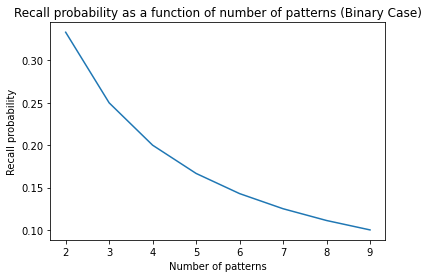

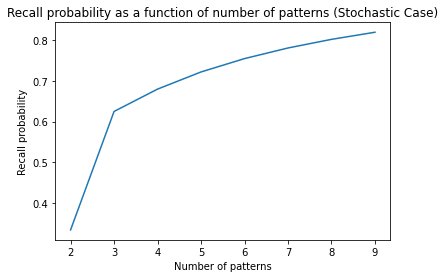

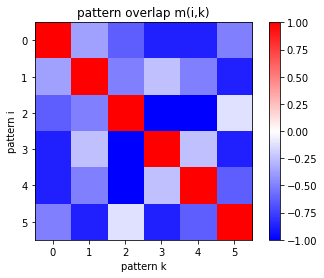

In [96]:
%matplotlib inline
!pip install neurodynex3
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
import matplotlib.pyplot as plt



def recall_prob(nrp, prob=0.5):
  pattern_size = 5
  # create an instance of the class HopfieldNetwork
  hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
  # instantiate a pattern factory
  factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
  # create a checkerboard pattern and add it to the pattern list
  checkerboard = factory.create_checkerboard()
  pattern_list = [checkerboard]
  # add random patterns to the list
  pattern_list.extend(factory.create_random_pattern_list(nr_patterns=nrp, on_probability=prob))
  # plot_tools.plot_pattern_list(pattern_list)
  # how similar are the random patterns and the checkerboard? Check the overlaps
  overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
  count = 0
  for i in overlap_matrix.flatten():
    if i == 1:
      count +=1
  recall = count/len(overlap_matrix.flatten())
  return recall

#BinaryCase
nrp = np.arange(2,10)
f_x = [ recall_prob(x) for x in nrp ]
plt.plot(nrp, f_x)
plt.title("Recall probability as a function of number of patterns (Binary Case)")
plt.xlabel("Number of patterns")
plt.ylabel("Recall probability")
plt.show()
#StochasticCase
nrp = np.arange(2,10)
def stoc_prob(x):
  beta = 1
  return 0.5*(1 + np.tanh(beta* x))
  
f_x = [ recall_prob(x, stoc_prob(x)) for x in nrp ]
plt.plot(nrp, f_x)
plt.title("Recall probability as a function of number of patterns (Stochastic Case)")
plt.xlabel("Number of patterns")
plt.ylabel("Recall probability")
plt.show()
#The curve for the stochastic case is the exact inverse of the curve obtained from the binary case

plot_tools.plot_overlap_matrix(overlap_matrix)
# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)
noise = 0.625
# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
hopfield_net.set_state_from_pattern(noisy_init_state)


# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
# plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")



